# EDA - Í≤∞Ï∏°Ïπò/Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Î∞è Ï≤òÎ¶¨(Ïã¨Ìôî)

## Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# Ïò®ÎùºÏù∏ ÏÜåÎß§ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (Ïª¨ÎüºÎ™Ö ÏÜåÎ¨∏Ïûê Î≤ÑÏ†Ñ)
np.random.seed(42)
n_customers = 1000

def create_realistic_ecommerce_data(n=1000):
    """Ïã§Ï†úÏôÄ Ïú†ÏÇ¨Ìïú Ï†ÑÏûêÏÉÅÍ±∞Îûò Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (ÏÜåÎ¨∏Ïûê Ïª¨ÎüºÎ™Ö)"""
    
    data = {}
    
    # Í≥†Í∞ù Í∏∞Î≥∏ Ï†ïÎ≥¥
    data['customer_id'] = range(1, n+1)
    data['age'] = np.random.normal(35, 12, n).clip(18, 80).astype(int)
    data['gender'] = np.random.choice(['M', 'F'], n, p=[0.45, 0.55])
    data['city'] = np.random.choice(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju'], 
                                   n, p=[0.4, 0.2, 0.15, 0.15, 0.1])
    
    # Íµ¨Îß§ ÌñâÎèô Îç∞Ïù¥ÌÑ∞
    data['total_purchases'] = np.random.poisson(8, n) + 1
    data['avg_order_value'] = np.random.lognormal(4.5, 0.8, n).round(2)
    data['days_since_last_purchase'] = np.random.exponential(30, n).astype(int)
    
    # ÎßåÏ°±ÎèÑ Î∞è Ï∂©ÏÑ±ÎèÑ
    data['satisfaction_score'] = np.random.normal(3.8, 1.2, n).clip(1, 5).round(1)
    data['loyalty_points'] = (data['total_purchases'] * data['avg_order_value'] * 0.1 + 
                             np.random.normal(0, 100, n)).clip(0, None).round(0)
    
    # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Íµ¨Îß§ Í∏àÏï°
    categories = ['electronics', 'clothing', 'books', 'home', 'sports']
    for cat in categories:
        # ÏùºÎ∂Ä Í≥†Í∞ùÏùÄ ÌäπÏ†ï Ïπ¥ÌÖåÍ≥†Î¶¨ÏóêÏÑú Íµ¨Îß§ÌïòÏßÄ ÏïäÏùå
        values = np.random.lognormal(3, 1, n)
        # 30% ÌôïÎ•†Î°ú Ìï¥Îãπ Ïπ¥ÌÖåÍ≥†Î¶¨ Íµ¨Îß§ Ïïà Ìï® (0ÏúºÎ°ú ÏÑ§Ï†ï)
        mask = np.random.random(n) < 0.3
        values[mask] = 0
        data[f'{cat}_spending'] = values.round(2)
    
    df = pd.DataFrame(data)
    
    # ÏùòÎèÑÏ†Å Í≤∞Ï∏°Í∞í ÏÉùÏÑ± (Ïã§Ï†ú ÏÉÅÌô© Î™®Î∞©)
    
    # 1. MCAR(Missing Completely at Random): ÏôÑÏ†Ñ Î¨¥ÏûëÏúÑ Í≤∞Ï∏° (ÏãúÏä§ÌÖú Ïò§Î•ò)
    missing_indices = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
    df.loc[missing_indices, 'satisfaction_score'] = np.nan
    
    # 2. MAR(Missing at Random): Ï°∞Í±¥Î∂Ä Í≤∞Ï∏° (ÎÇòÏù¥Í∞Ä ÎÜíÏùÑÏàòÎ°ù ÎßåÏ°±ÎèÑ ÏùëÎãµ Í±∞Î∂ÄÏú® Ï¶ùÍ∞Ä)
    elderly_mask = df['age'] > 50
    elderly_missing = np.random.random(elderly_mask.sum()) < 0.15  
    elderly_indices = df[elderly_mask].index[elderly_missing]
    df.loc[elderly_indices, 'satisfaction_score'] = np.nan
    
    # 3. MNAR(Missing Not at Random): ÎπÑÎ¨¥ÏûëÏúÑ Í≤∞Ï∏° - Í≤∞Ï∏° ÏûêÏ≤¥Í∞Ä ÏùòÎØ∏ (ÎÜíÏùÄ ÏÜåÎìùÏûêÎì§Ïù¥ Í∞úÏù∏Ï†ïÎ≥¥ ÎπÑÍ≥µÍ∞ú)
    high_spenders = df['avg_order_value'] > df['avg_order_value'].quantile(0.8)
    high_spender_missing = np.random.random(high_spenders.sum()) < 0.25
    high_spender_indices = df[high_spenders].index[high_spender_missing]
    df.loc[high_spender_indices, 'age'] = np.nan
    
    # ÎèÑÏãú Ï†ïÎ≥¥ ÏùºÎ∂Ä Í≤∞Ï∏° (Î∞∞ÏÜ°ÏßÄ ÎØ∏ÏûÖÎ†•)
    city_missing = np.random.choice(df.index, size=int(0.08 * len(df)), replace=False)
    df.loc[city_missing, 'city'] = np.nan
    
    # ÏùòÎèÑÏ†Å Ïù¥ÏÉÅÍ∞í ÏÉùÏÑ±
    
    # 1. Îç∞Ïù¥ÌÑ∞ ÏûÖÎ†• Ïò§Î•ò (ÎÇòÏù¥ 999ÏÇ¥)
    error_indices = np.random.choice(df.index, size=3, replace=False)
    df.loc[error_indices, 'age'] = 999
    
    # 2. ÎπÑÏ¶àÎãàÏä§ Ïù¥ÏÉÅÍ∞í (VIP Í≥†Í∞ùÏùò Í∑πÎèÑÎ°ú ÎÜíÏùÄ Íµ¨Îß§Ïï°) Extreme but Valid Outliers
    vip_indices = np.random.choice(df.index, size=5, replace=False)
    df.loc[vip_indices, 'avg_order_value'] *= 20
    df.loc[vip_indices, 'loyalty_points'] *= 10
    
    # 3. ÏãúÏä§ÌÖú Î≤ÑÍ∑∏Î°ú Ïù∏Ìïú ÏùåÏàòÍ∞í
    bug_indices = np.random.choice(df.index, size=2, replace=False) 
    df.loc[bug_indices, 'days_since_last_purchase'] = -1
    
    return df

# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
ecommerce = create_realistic_ecommerce_data(1000)

print("=== Ïò®ÎùºÏù∏ ÏÜåÎß§ Îç∞Ïù¥ÌÑ∞ Í∞úÏöî ===")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {ecommerce.shape}")
print("\nÎç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
display(ecommerce.head(10))

print(f"\nÍ∏∞Î≥∏ Ï†ïÎ≥¥:")
print(ecommerce.info())

=== Ïò®ÎùºÏù∏ ÏÜåÎß§ Îç∞Ïù¥ÌÑ∞ Í∞úÏöî ===
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1000, 14)

Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:


customer_id   age gender     city  total_purchases  avg_order_value  \
0            1  40.0      M    Seoul                9            80.62   
1            2  33.0      M    Seoul                9            27.69   
2            3  42.0      F    Seoul                5            71.05   
3            4  53.0      F    Seoul               11           158.62   
4            5  32.0      M  Incheon               14            79.10   
5            6  32.0      F    Busan                7            75.49   
6            7  53.0      M    Busan               10            92.04   
7            8  44.0      F    Seoul               10            95.80   
8            9  29.0      F  Gwangju               10           156.80   
9           10  41.0      F    Seoul                4           157.57   

   days_since_last_purchase  satisfaction_score  loyalty_points  \
0                         8                 3.8            86.0   
1                         4                 2.0             0.0   
2                        58                 2.5             0.0   
3                        24                 1.8           318.0   
4                        59                 5.0           228.0   
5                        53                 3.2           151.0   
6                         9                 5.0           123.0   
7                        23                 1.0           135.0   
8                         2                 5.0            76.0   
9                        74                 3.7            77.0   

   electronics_spending  clothing_spending  books_spending  home_spending  \
0                 18.44               0.00           10.65           0.00   
1                 46.54               0.00          210.79          17.13   
2                  0.00               4.54            0.00           9.48   
3                 26.55              25.55            3.49           5.04   
4                 23.31               6.52            6.34          29.39   
5                 48.28               4.30           31.78           0.00   
6                  0.00              19.93            6.88         109.88   
7                 37.61              23.63           24.12          13.02   
8                 24.55              18.20           20.30           3.03   
9                  0.00              31.13            0.00           0.00   

   sports_spending  
0           184.52  
1            20.43  
2             0.00  
3            41.76  
4            18.09  
5            10.51  
6             0.00  
7             0.00  
8            13.65  
9             0.00


Í∏∞Î≥∏ Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1000 non-null   int64  
 1   age                       944 non-null    float64
 2   gender                    1000 non-null   object 
 3   city                      920 non-null    object 
 4   total_purchases           1000 non-null   int32  
 5   avg_order_value           1000 non-null   float64
 6   days_since_last_purchase  1000 non-null   int64  
 7   satisfaction_score        934 non-null    float64
 8   loyalty_points            1000 non-null   float64
 9   electronics_spending      1000 non-null   float64
 10  clothing_spending         1000 non-null   float64
 11  books_spending            1000 non-null   float64
 12  home_spending             1000 non-null   float64
 13  sports_spending           1000 non-null   float6

In [3]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÌÉú Ï†êÍ≤Ä - da_utils/profile.py Î™®Îìà(ÌååÏùº) ÏïàÏùò get_data_profile Ìï®ÏàòÎ•º Í∞ÄÏ†∏Ïò¥
from da_utils.profile import get_data_profile # Î∞îÎ°ú get_data_profile Ìï®ÏàòÎ•º Í∫ºÎÉàÏùå
# from da_utils import profile                # profile Î™®Îìà Ï†ÑÏ≤¥Î•º Í∫ºÎÇ¥ÏÑú Ïã§Ï†úÎ°ú ÏÇ¨Ïö©Ìï† ÎïåÎäî profile.get_data_profile Î°ú ÏÇ¨Ïö©Ìï¥Ïïº Ìï®

data_report = get_data_profile(ecommerce)

Ï¢ÖÌï© Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î¶¨Ìè¨Ìä∏

1. Í∏∞Î≥∏Ï†ïÎ≥¥
- Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 1000Ìñâ x 14Ïó¥
- Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 0.19mb
- ÏàòÏπòÌòï Î≥ÄÏàò: 12Í∞ú
- Î≤îÏ£ºÌòï Î≥ÄÏàò: 2Í∞ú

2. Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚ö†Ô∏è


Í≤∞Ï∏°Ïàò  Í≤∞Ï∏°Î•†(%)
age                  56     5.6
city                 80     8.0
satisfaction_score   66     6.6


3. ÏàòÏπòÌòï Î≥ÄÏàò ÌíàÏßà Î∂ÑÏÑù


Î≥ÄÏàòÎ™Ö       ÌèâÍ∑†     ÌëúÏ§ÄÌé∏Ï∞®    ÏµúÏÜüÍ∞í      ÏµúÎåìÍ∞í      ÏôúÎèÑ  \
0                customer_id  500.500  288.819   1.00  1000.00   0.000   
1                        age   38.090   55.408  18.00   999.00  16.626   
2            total_purchases    8.937    2.630   2.00    17.00   0.227   
3            avg_order_value  128.624  185.100   8.05  3603.40  11.637   
4   days_since_last_purchase   29.863   30.656  -1.00   191.00   1.688   
5         satisfaction_score    3.673    1.067   1.00     5.00  -0.506   
6             loyalty_points  131.534  158.522   0.00  1640.00   3.606   
7       electronics_spending   22.506   35.498   0.00   545.10   5.302   
8          clothing_spending   23.553   42.124   0.00   877.86   9.838   
9             books_spending   25.777   40.763   0.00   468.20   3.898   
10             home_spending   24.128   39.396   0.00   372.59   3.685   
11           sports_spending   23.176   45.685   0.00   903.90   9.004   

         Ï≤®ÎèÑ  Ïù¥ÏÉÅÍ∞íÎπÑÏú®(%)  Ïú†ÏùºÍ∞íÎπÑÏú®(%)  
0    -1.200     0.000   100.000  
1   286.612     1.059     5.508  
2    -0.097     0.000     1.600  
3   196.193     7.000    97.900  
4     3.301     4.800    13.300  
5    -0.586     0.000     4.390  
6    23.761     3.700    34.300  
7    54.688     6.300    67.000  
8   175.613     6.200    67.600  
9    23.960     7.100    66.400  
10   18.720     7.600    66.100  
11  145.158     7.400    62.000


4. Î∂ÑÌè¨ Ïù¥ÏÉÅ Í∞êÏßÄ

- Í∑πÏã¨Ìïú ÏôúÎèÑ (|skewness|>2)
‚ö†Ô∏è
-- age: ÏôúÎèÑ = 16.626
-- avg_order_value: ÏôúÎèÑ = 11.637
-- loyalty_points: ÏôúÎèÑ = 3.606
-- electronics_spending: ÏôúÎèÑ = 5.302
-- clothing_spending: ÏôúÎèÑ = 9.838
-- books_spending: ÏôúÎèÑ = 3.898
-- home_spending: ÏôúÎèÑ = 3.685
-- sports_spending: ÏôúÎèÑ = 9.004

- ÎÜíÏùÄ Ïù¥ÏÉÅÍ∞í ÎπÑÏú®(>5%)
‚ö†Ô∏è
-- avg_order_value: Ïù¥ÏÉÅÍ∞í 7.0%
-- electronics_spending: Ïù¥ÏÉÅÍ∞í 6.3%
-- clothing_spending: Ïù¥ÏÉÅÍ∞í 6.2%
-- books_spending: Ïù¥ÏÉÅÍ∞í 7.1%
-- home_spending: Ïù¥ÏÉÅÍ∞í 7.6%
-- sports_spending: Ïù¥ÏÉÅÍ∞í 7.4%


## Í≤∞Ï∏°Ïπò Ìå®ÌÑ¥ Î∂ÑÏÑù

=== Í≤∞Ï∏°Í∞í Ìå®ÌÑ¥ Î∂ÑÏÑù ===
Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏° ÌòÑÌô©


Í≤∞Ï∏°Ïàò  Í≤∞Ï∏°Î•†(%)
city                 80     8.0
satisfaction_score   66     6.6
age                  56     5.6

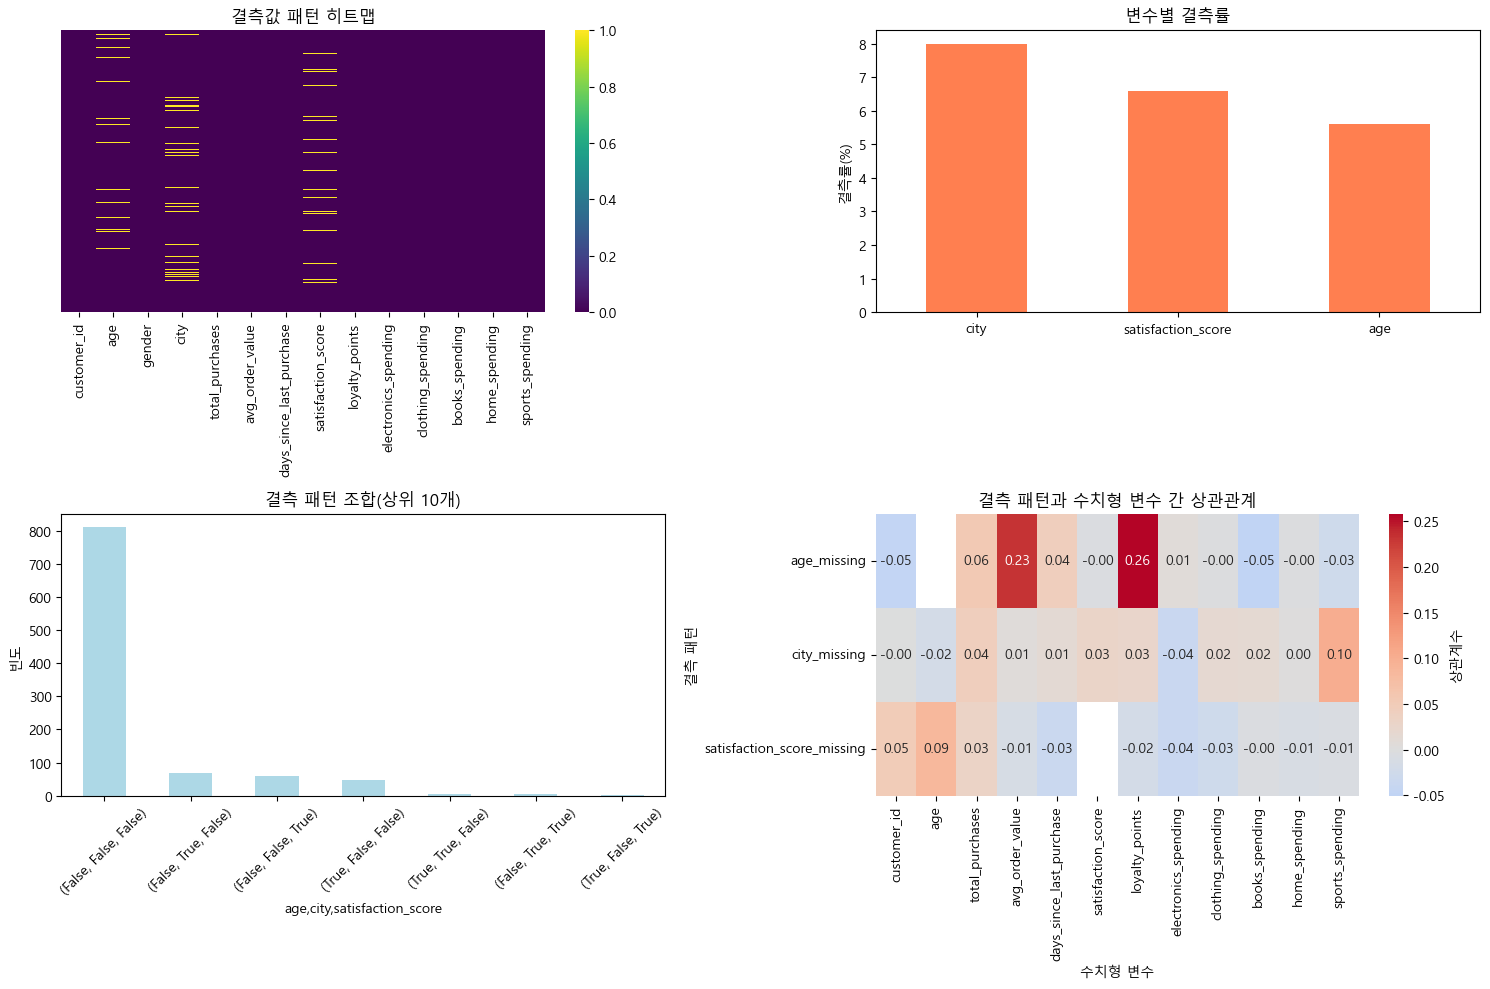

In [4]:
# Í≤∞Ï∏°Ïπò Ìå®ÌÑ¥ Î∂ÑÏÑù

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏÑ†ÌÉùÏÇ¨Ìï≠)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def analyze_missing_patterns(df: pd.DataFrame):
    """Í≤∞Ï∏°Í∞í Ìå®ÌÑ¥ Ï¢ÖÌï© Î∂ÑÏÑù"""
    
    print('=== Í≤∞Ï∏°Í∞í Ìå®ÌÑ¥ Î∂ÑÏÑù ===')
    missing_info = df.isna().sum()
    missing_pct = (missing_info / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Í≤∞Ï∏°Ïàò': missing_info,
        'Í≤∞Ï∏°Î•†(%)': missing_pct.round(2),
    })
    missing_summary = missing_summary[missing_summary['Í≤∞Ï∏°Ïàò'] > 0].sort_values('Í≤∞Ï∏°Ïàò', ascending=False)
    print('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏° ÌòÑÌô©')
    display(missing_summary)
    fig, axes = plt.subplots(2, 2, figsize=(15,10))
    a1, a2, a3, a4 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]
    
    # 1. Í≤∞Ï∏°Í∞í ÌûàÌä∏Îßµ
    sns.heatmap(df.isna(), yticklabels=False, cbar=True, cmap='viridis', ax=a1)
    a1.set_title('Í≤∞Ï∏°Í∞í Ìå®ÌÑ¥ ÌûàÌä∏Îßµ')
    
    # 2. Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Î•† Î∞î Ï∞®Ìä∏
    if len(missing_summary) > 0:  # >0ÏùÄ ÏÉùÎûµ Í∞ÄÎä•(ÎÇ¥Ïö©Ïù¥ ÏûàÎã§Î©¥)
        missing_summary['Í≤∞Ï∏°Î•†(%)'].plot(kind='bar', color='coral', ax=a2)
        a2.set_title('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Î•†')    
        a2.set_ylabel('Í≤∞Ï∏°Î•†(%)')
        a2.tick_params(axis='x', rotation=0)
    
    # 3. Í≤∞Ï∏°Í∞í Ï°∞Ìï© Ìå®ÌÑ¥ - Í≤∞Ï∏°Ïù¥ ÎèôÏãúÏóê Î∞úÏÉùÌïòÎäî Î≥ÄÏàò ÌååÏïÖ ÌõÑ Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎßéÏúºÎ©¥ Ïó∞Í¥ÄÏùÑ ÏÉùÍ∞ÅÌï† Ïàò ÏûàÏùå -> 4Î≤àÏóêÏÑú Í∑∏Î£πÎ≥ÑÎ°ú Ï≤òÎ¶¨ Í∞ÄÎä•
    '''
    df.isna().any()                           -> Ïª¨ÎüºÏóê Í≤∞Ï∏°Í∞íÏù¥ ÏûàÏúºÎ©¥ True, ÏóÜÏúºÎ©¥ False
    df.columns[df.isna().any()]               -> Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî Ïª¨ÎüºÎ™ÖÏùÑ Ï∂îÏ∂ú
    df[df.columns[df.isna().any()]]           -> Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî Ïª¨ÎüºÏùò Ï†ÑÏ≤¥Í∞íÏùÑ Ï∂îÏ∂úÌï®
    df[df.columns[df.isna().any()]].isna()    -> Í≤∞Ï∏°Í∞íÏù¥ÎùºÎ©¥ TrueÎ°ú ÏÑ§Ï†ïÌï®
    Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî age, city, satisfaction_score Í∞ÑÏóê Ïñ¥Îñ§ Ï°∞Ìï©Ïù¥ Í∞ÄÏû• ÎßéÏùÄÏßÄ ÌååÏïÖ
    '''
    missing_pattern = df[df.columns[df.isna().any()]].isna()
    if len(missing_pattern):
        pattern_counts = missing_pattern.value_counts().head(10)
        pattern_counts.plot(kind='bar', color='lightblue', ax=a3)
        a3.set_title('Í≤∞Ï∏° Ìå®ÌÑ¥ Ï°∞Ìï©(ÏÉÅÏúÑ 10Í∞ú)')
        a3.set_ylabel('ÎπàÎèÑ')
        a3.tick_params(axis='x', rotation=45)


    # 4. Í≤∞Ï∏° Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏° Ïó¨Î∂Ä(0/1)ÏôÄ Îã§Î•∏ ÏàòÏπòÌòï Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    missing_cols = df.columns[df.isna().any()].tolist()

    if len(numeric_cols) > 0 and len(missing_cols) > 0:
        # Í≤∞Ï∏°Í∞íÏùÑ 0/1Î°ú Î≥ÄÌôòÌïú DataFrame ÏÉùÏÑ±
        missing_binary = df[missing_cols].isna().astype(int)
        missing_binary.columns = [f'{col}_missing' for col in missing_binary.columns]
        
        # ÏàòÏπòÌòï Î≥ÄÏàòÏôÄ Í≤∞Ï∏° Ìå®ÌÑ¥ Î≥ÄÏàò Í≤∞Ìï©
        corr_data = pd.concat([df[numeric_cols], missing_binary], axis=1)
        
        # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
        correlation_matrix = corr_data.corr()
        
        # Í≤∞Ï∏° Ìå®ÌÑ¥ Î≥ÄÏàòÏôÄ ÏàòÏπòÌòï Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎßå Ï∂îÏ∂ú
        missing_numeric_corr = correlation_matrix.loc[
            missing_binary.columns, 
            numeric_cols
        ]
        
        # ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî Í≤ΩÏö∞ÏóêÎßå ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
        if missing_numeric_corr.shape[0] > 0 and missing_numeric_corr.shape[1] > 0:
            sns.heatmap(
                    missing_numeric_corr, 
                    annot=True, 
                    cmap='coolwarm', 
                    center=0,
                    fmt='.2f',
                    ax=a4,
                    cbar_kws={'label': 'ÏÉÅÍ¥ÄÍ≥ÑÏàò'},
                )
            a4.set_title('Í≤∞Ï∏° Ìå®ÌÑ¥Í≥º ÏàòÏπòÌòï Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')
            a4.set_xlabel('ÏàòÏπòÌòï Î≥ÄÏàò')
            a4.set_ylabel('Í≤∞Ï∏° Ìå®ÌÑ¥')
        else:
            a4.text(0.5, 0.5, 'Î∂ÑÏÑùÌï† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏóÜÏùå', ha='center', va='center')
            a4.axis('off')
    else:
        a4.text(0.5, 0.5, 'ÏàòÏπòÌòï Î≥ÄÏàò ÎòêÎäî\nÍ≤∞Ï∏°Í∞íÏù¥ ÏóÜÏùå', ha='center', va='center')
        a4.axis('off')

    
    plt.tight_layout()
    plt.show()
    
analyze_missing_patterns(ecommerce)

=== Í≤∞Ï∏°Í∞í Ìå®ÌÑ¥ Î∂ÑÏÑù ===
Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏° ÌòÑÌô©


Í≤∞Ï∏°Ïàò  Í≤∞Ï∏°Î•†(%)
city                 80     8.0
satisfaction_score   66     6.6
age                  56     5.6

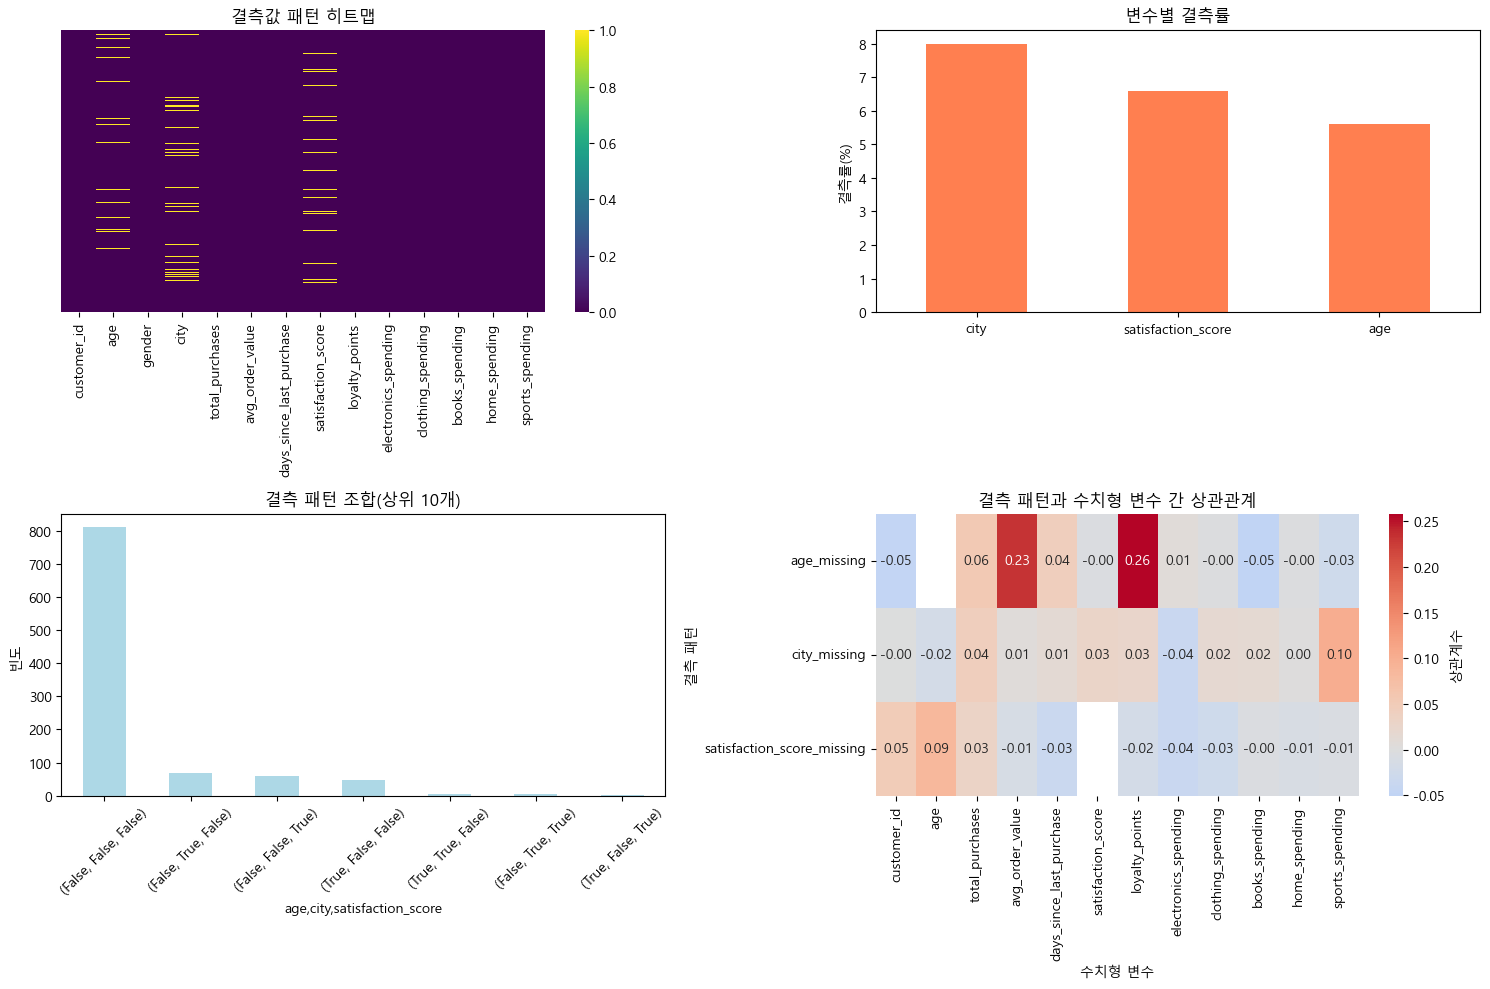

In [5]:
# ÌååÏù¥Ïç¨ Î™®ÎìàÏóêÏÑú Î∂àÎü¨Ïò§Í∏∞

from da_utils.patterns import analyze_missing_patterns
analyze_missing_patterns(ecommerce)

In [6]:
# Í≤∞Ï∏° Î©îÏª§ÎãàÏ¶ò ÏßÑÎã®
from scipy.stats import chi2_contingency


print('=== Í≤∞Ï∏° Î©îÏª§ÎãàÏ¶ò ÏßÑÎã® ===')

# MAR(Ï°∞Í±¥Î∂Ä) Ìå®ÌÑ¥
# Í∞ÄÏÑ§: ÎÇòÏù¥ Í≤∞Ï∏°Í≥º Íµ¨Îß§Ïï° Í∞Ñ Í¥ÄÍ≥Ñ
if ecommerce['age'].isna().sum():
    print('\n1. ÎÇòÏù¥(age) Í≤∞Ï∏° Î©îÏª§ÎãàÏ¶ò Î∂ÑÏÑù')

    # Íµ¨Îß§Ïï° Î∂ÑÏúÑÎ≥Ñ ÎÇòÏù¥ Í≤∞Ï∏°Î•†
    df_temp = ecommerce.copy()
    df_temp['spending_quertile'] = pd.qcut(df_temp['avg_order_value'].dropna(), q=4, labels=['4Î∂ÑÏúÑ', '3Î∂ÑÏúÑ', '2Î∂ÑÏúÑ', '1Î∂ÑÏúÑ'])
    age_missing_by_spending = df_temp.groupby('spending_quertile')['age'].apply(lambda x: x.isnull().mean())  # Î∂ÑÏúÑÎ≥ÑÎ°ú Í∑∏Î£πÏùÑ ÏßìÍ≥†, Í∑∏Î£πÎ≥ÑÎ°ú Í∞Å Í∞íÏóê isnull(T/FÎ°ú Î≥ÄÌôò)ÏùÑ Ï†ÅÏö© ÌõÑ ÌèâÍ∑†(T/FÎäî 1/0)ÏùÑ Í≥ÑÏÇ∞
    print('\n üí≤Íµ¨Îß§Ïï° Î∂ÑÏúÑÎ≥Ñ ÎÇòÏù¥ Í≤∞Ï∏°Î•†')
    for key, value in age_missing_by_spending.items():
        print(f' {key}: {value:.1%}')
        
    con_table = pd.crosstab(df_temp['spending_quertile'], df_temp['age'].isnull())
    chi2, p_value, _, _ = chi2_contingency(con_table)

    # print(f'\nÏπ¥Ïù¥^2 ÌÜµÍ≥ÑÎüâ: {chi2:.3f}, p-value: {p_value:.4f}')
    if p_value < 0.05:
        print(' ‚úÖMAR ÌôïÏù∏: Íµ¨Îß§Ïï°Ïóê Îî∞Îùº ÎÇòÏù¥ Í≤∞Ï∏°Î•†Ïù¥ Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î¶Ñ')
    else:
        print(' ‚ùåMCAR Í∞ÄÎä•ÏÑ± ÏûàÏùå: Íµ¨Îß§Ïï°Í≥º ÎÇòÏù¥ Í≤∞Ï∏°Î•†ÏùÄ ÏÑúÎ°ú ÎèÖÎ¶ΩÏ†Å')

else:
    print(' ÎÇòÏù¥(age) Í≤∞Ï∏° ÏóÜÏùå')
    
    
# ÎßåÏ°±ÎèÑ Í≤∞Ï∏° Ìå®ÌÑ¥ Î∂ÑÏÑù
print('\n2. ÎßåÏ°±ÎèÑ(satisfaction_score) Í≤∞Ï∏° Î©îÏª§ÎãàÏ¶ò Î∂ÑÏÑù')

if ecommerce['satisfaction_score'].isna().sum():
    # Ïó∞Î†πÎåÄÎ≥Ñ ÎßåÏ°±ÎèÑ Í≤∞Ï∏°Î•† [0, 30, 50, 100] - [Ï≤≠ÎÖÑÏ∏µ(~30), Ï§ëÎÖÑÏ∏µ(31~50), ÎÖ∏ÎÖÑÏ∏µ(51~)]
    # Í∞Å Íµ¨Í∞ÑÎßàÎã§ ÎßåÏ°±ÎèÑÍ∞Ä ÏóÜÎäî ÏÇ¨ÎûåÎì§Ïùò %Î•º Íµ¨Ìï¥ÏÑú print
    print('\n üßìÏó∞Î†πÎ≥Ñ ÎßåÏ°±ÎèÑ Í≤∞Ï∏°Î•†')
    df_temp = ecommerce.copy()
    df_temp['age_group'] = pd.cut(df_temp['age'].dropna(), bins=[0, 30, 50, 200], labels=['Ï≤≠ÎÖÑÏ∏µ', 'Ï§ëÎÖÑÏ∏µ', 'ÎÖ∏ÎÖÑÏ∏µ'])
    satisfaction_missing_by_age = df_temp.groupby('age_group')['satisfaction_score'].apply(lambda x: x.isnull().sum() / len(x))

    for key, value in satisfaction_missing_by_age.items():
        print(f' {key}: {value:.1%}')

    con_table = pd.crosstab(df_temp['age_group'], df_temp['satisfaction_score'].isnull())
    chi2, p_value, _, _ = chi2_contingency(con_table)

    if p_value < 0.05:
        print(' ‚úÖMAR ÌôïÏù∏: Ïó∞Î†πÏóê Îî∞Îùº ÎßåÏ°±ÎèÑ Í≤∞Ï∏°Î•†Ïù¥ Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î¶Ñ')
    else:
        print(' ‚ùåMCAR Í∞ÄÎä•ÏÑ± ÏûàÏùå: Ïó∞Î†πÍ≥º ÎßåÏ°±ÎèÑ Í≤∞Ï∏°Î•†ÏùÄ ÏÑúÎ°ú ÎèÖÎ¶ΩÏ†Å')


    # ÏÑ±Î≥ÑÎ≥Ñ ÎßåÏ°±ÎèÑ Í≤∞Ï∏°Î•†ÎèÑ
    print('\n ‚ôÇÔ∏èÏÑ±Î≥ÑÎ≥Ñ ÎßåÏ°±ÎèÑ Í≤∞Ï∏°Î•†')

    df_temp = ecommerce.copy()
    satisfaction_missing_by_gender = df_temp.groupby('gender')['satisfaction_score'].apply(lambda x: x.isnull().sum() / len(x))

    for key, value in satisfaction_missing_by_gender.items():
        print(f' {key}: {value:.1%}')


    con_table = pd.crosstab(df_temp['gender'], df_temp['satisfaction_score'].isnull())
    chi2, p_value, _, _ = chi2_contingency(con_table)

    if p_value < 0.05:
        print(' ‚úÖMAR ÌôïÏù∏: ÏÑ±Î≥ÑÏóê Îî∞Îùº ÎßåÏ°±ÎèÑ Í≤∞Ï∏°Î•†Ïù¥ Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î¶Ñ')
    else:
        print(' ‚ùåMCAR Í∞ÄÎä•ÏÑ± ÏûàÏùå: ÏÑ±Î≥ÑÍ≥º ÎßåÏ°±ÎèÑ Í≤∞Ï∏°Î•†ÏùÄ ÏÑúÎ°ú ÎèÖÎ¶ΩÏ†Å')
        
else:
    print(' ÎßåÏ°±ÎèÑ Í≤∞Ï∏° ÏóÜÏùå')

=== Í≤∞Ï∏° Î©îÏª§ÎãàÏ¶ò ÏßÑÎã® ===

1. ÎÇòÏù¥(age) Í≤∞Ï∏° Î©îÏª§ÎãàÏ¶ò Î∂ÑÏÑù

 üí≤Íµ¨Îß§Ïï° Î∂ÑÏúÑÎ≥Ñ ÎÇòÏù¥ Í≤∞Ï∏°Î•†
 4Î∂ÑÏúÑ: 0.0%
 3Î∂ÑÏúÑ: 0.0%
 2Î∂ÑÏúÑ: 0.0%
 1Î∂ÑÏúÑ: 22.4%
 ‚úÖMAR ÌôïÏù∏: Íµ¨Îß§Ïï°Ïóê Îî∞Îùº ÎÇòÏù¥ Í≤∞Ï∏°Î•†Ïù¥ Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î¶Ñ

2. ÎßåÏ°±ÎèÑ(satisfaction_score) Í≤∞Ï∏° Î©îÏª§ÎãàÏ¶ò Î∂ÑÏÑù

 üßìÏó∞Î†πÎ≥Ñ ÎßåÏ°±ÎèÑ Í≤∞Ï∏°Î•†
 Ï≤≠ÎÖÑÏ∏µ: 4.0%
 Ï§ëÎÖÑÏ∏µ: 5.8%
 ÎÖ∏ÎÖÑÏ∏µ: 20.4%
 ‚úÖMAR ÌôïÏù∏: Ïó∞Î†πÏóê Îî∞Îùº ÎßåÏ°±ÎèÑ Í≤∞Ï∏°Î•†Ïù¥ Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î¶Ñ

 ‚ôÇÔ∏èÏÑ±Î≥ÑÎ≥Ñ ÎßåÏ°±ÎèÑ Í≤∞Ï∏°Î•†
 F: 5.6%
 M: 7.9%
 ‚ùåMCAR Í∞ÄÎä•ÏÑ± ÏûàÏùå: ÏÑ±Î≥ÑÍ≥º ÎßåÏ°±ÎèÑ Í≤∞Ï∏°Î•†ÏùÄ ÏÑúÎ°ú ÎèÖÎ¶ΩÏ†Å


## Í≥†Í∏â Í≤∞Ï∏°Í∞í ÎåÄÏ≤¥ Í∏∞Î≤ï

ÏõêÎ≥∏Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Î•†
  age: 5.60%
  satisfaction_score: 6.60%


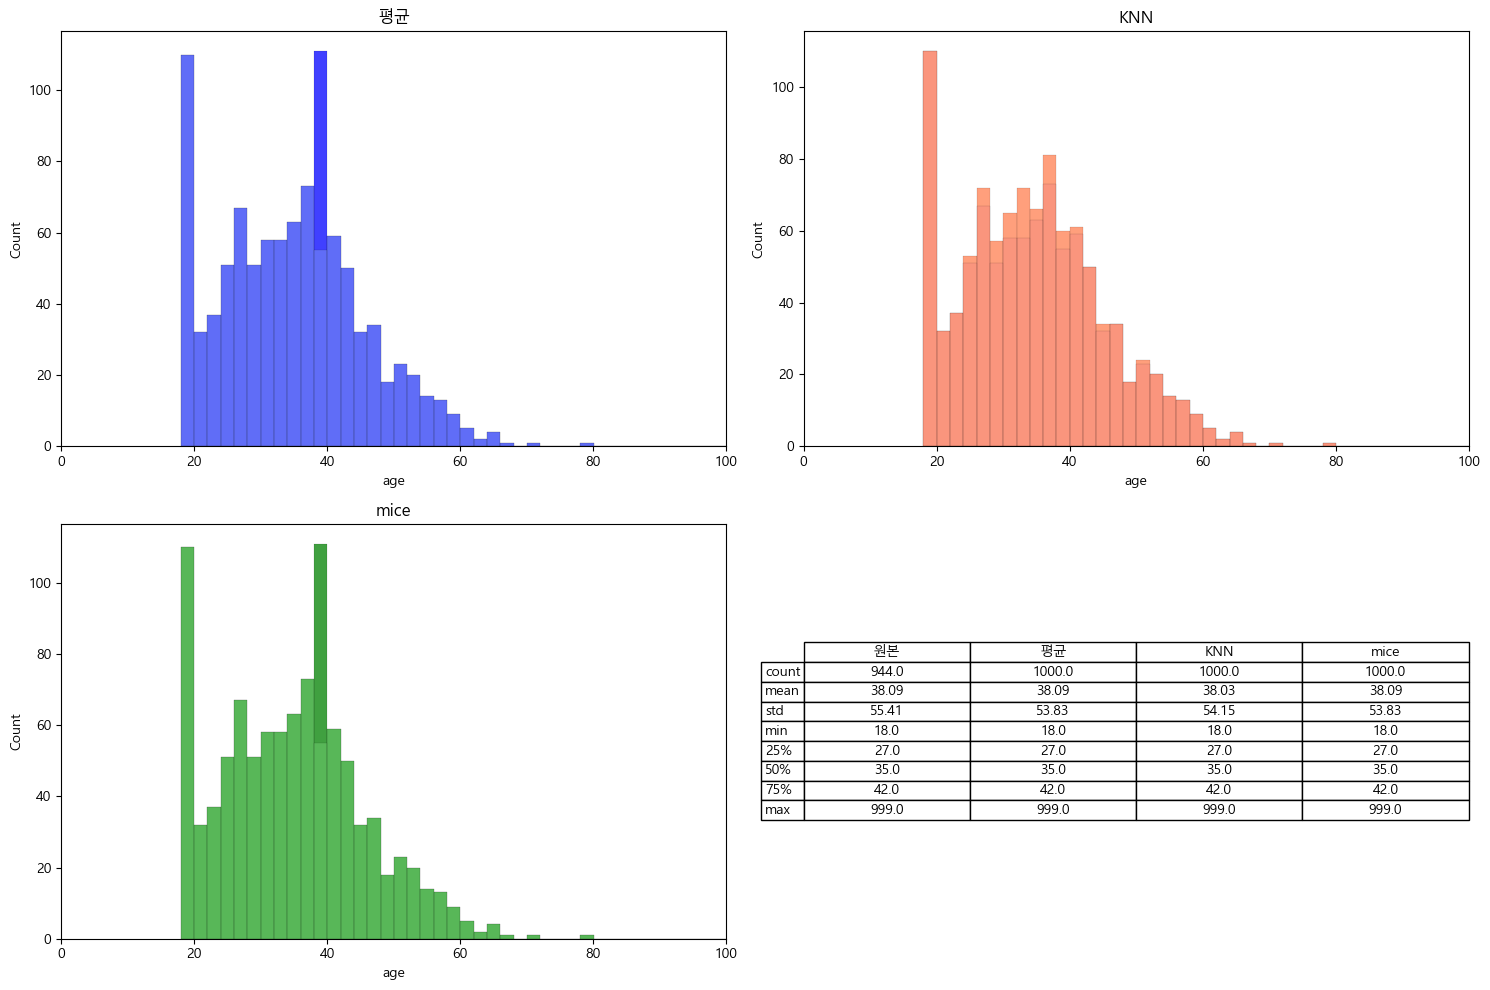

In [7]:
# impute: ÎåÄÏ≤¥ÌïòÎã§
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Ïà´ÏûêÌòï Ïª¨ÎüºÎßå ÎΩëÍ∏∞
numeric_cols = ['age', 'total_purchases', 'avg_order_value', 'days_since_last_purchase', 'satisfaction_score', 'loyalty_points']
df_numeric = ecommerce[numeric_cols]
print('ÏõêÎ≥∏Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Î•†')
for col in numeric_cols:
    missing_rate = df_numeric[col].isnull().mean()
    if missing_rate:
        print(f'  {col}: {missing_rate:.2%}')

# 1. Í≤∞Ï∏°Ïóê Ï†ÑÎ∂Ä ÌèâÍ∑†ÏùÑ ÏßëÏñ¥ÎÑ£ÏóàÏùå
imputer_mean = SimpleImputer(strategy='mean')
df_mean = df_numeric.copy()
df_mean[numeric_cols] = imputer_mean.fit_transform(df_numeric[numeric_cols])


# 2. KNN ÎåÄÏ≤¥ - K Nearest Neighbors, Í≤∞Ï∏°Í∞íÍ≥º Í∞ÄÏû• Í∞ÄÍπåÏö¥ nÎ™ÖÏùÑ ÎΩëÏïÑÏÑú Í∑∏ ÏÇ¨ÎûåÎì§Ïùò ÌèâÍ∑†ÏùÑ Íµ¨Ìï®
imputer_knn = KNNImputer(n_neighbors=5)
df_knn = df_numeric.copy()
df_knn[numeric_cols] = imputer_knn.fit_transform(df_numeric[numeric_cols])


# 3. MICE ÎåÄÏ≤¥ - Multiple Imputation by Chained Equations, Í≤∞Ï∏°Î≥ÄÏàòÎ•º Îã§Î•∏ Î≥ÄÏàòÎ•º Ïç®ÏÑú ÌöåÍ∑ÄÎ™®Îç∏ ÏòàÏ∏°
imputer_mice = IterativeImputer(random_state=42, max_iter=10)
df_mice = df_numeric.copy()
df_mice[numeric_cols] = imputer_mice.fit_transform(df_numeric[numeric_cols])

# age Î≥ÄÏàòÏùò ÎåÄÏ≤¥Í≤∞Í≥º ÎπÑÍµê ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15,10))
a1, a2, a3, a4 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]

variable = 'age'
if df_numeric[variable].isnull().sum():
    
    sns.histplot(df_mean[variable], binwidth=2, kde=False, ax=a1, label='ÌèâÍ∑†', color='blue')
    sns.histplot(df_numeric[variable], binwidth= 2, kde=False, ax=a1, label='ÏõêÎ≥∏', color='lightblue', alpha=0.3)
    a1.set_xlim(0, 100)
    a1.set_title('ÌèâÍ∑†')
        
    sns.histplot(df_knn[variable], binwidth= 2, kde=False, ax=a2, label = 'KNN', color='coral')
    sns.histplot(df_numeric[variable], binwidth= 2, kde=False, ax=a2, label='ÏõêÎ≥∏', color='lightcoral', alpha=0.3)
    a2.set_xlim(0, 100)
    a2.set_title('KNN')

    sns.histplot(df_mice[variable], binwidth= 2, kde=False, ax=a3, label = 'mice', color='green')
    sns.histplot(df_numeric[variable], binwidth= 2, kde=False, ax=a3, label='ÏõêÎ≥∏', color='lightgreen', alpha=0.3)
    a3.set_xlim(0, 100)
    a3.set_title('mice')
    
    
    # ÎåÄÏ≤¥ Ï†ÑÌõÑ ÌÜµÍ≥ÑÎüâ ÎπÑÍµê
    comparison_stats = pd.DataFrame({
        'ÏõêÎ≥∏': df_numeric[variable].describe(),
        'ÌèâÍ∑†': df_mean[variable].describe(),
        'KNN': df_knn[variable].describe(),
        'mice': df_mice[variable].describe(),
    }).round(2)
    
    # ÌÖçÏä§Ìä∏Î°ú ÌÜµÍ≥Ñ ÎπÑÍµê ÌëúÏãú
    a4.axis('off')
    a4.table(
        cellText=comparison_stats.values,
        rowLabels=comparison_stats.index,
        colLabels=comparison_stats.columns,
        cellLoc='center',
        loc='center',
    )
    
    plt.tight_layout()
    plt.show()

## ÎåÄÏ≤¥ ÌíàÏßà ÌèâÍ∞Ä

In [8]:
print('=== ÎåÄÏ≤¥ ÌíàÏßà ÌèâÍ∞Ä ===')
dist_evaluation_results = []
corr_evaluation_results = []
original_df = df_numeric
imputed_dfs = [df_mean, df_knn, df_mice ]
method_names = ['ÌèâÍ∑†ÎåÄÏ≤¥', 'KNNÎåÄÏ≤¥', 'MICEÎåÄÏ≤¥']

for method_name, imputed_df in zip(method_names, imputed_dfs):
    
    for col in ['age','satisfaction_score']:
        # 1. Î∂ÑÌè¨ Ïú†ÏÇ¨ÏÑ± ÌèâÍ∞Ä
        # Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Í≤ΩÏö∞Îßå
        if original_df[col].isnull().sum():
            
            original_stats = original_df[col].dropna().describe()
            imputed_stats = imputed_df[col].describe()
            
            # ÌèâÍ∑†Ï∞®Ïù¥
            mean_diff = abs(original_stats['mean'] - imputed_stats['mean']) / original_stats['mean'] * 100
            # ÌëúÏ§ÄÌé∏Ï∞®Ï∞®Ïù¥
            std_diff = abs(original_stats['std'] - imputed_stats['std']) / original_stats['std'] * 100
            
            dist_evaluation_results.append({
                'Î∞©Î≤ï': method_name,
                'Î≥ÄÏàò': col,
                'ÌèâÍ∑†Ï∞®Ïù¥(%)': mean_diff,
                'ÌëúÏ§ÄÌé∏Ï∞®Ï∞®Ïù¥(%)': std_diff,
            })

        # 2. Îã§Î•∏ Î≥ÄÏàòÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î≥¥Ï°¥ ÌèâÍ∞Ä - age, satisfaction_score <-> average_order_value
        # Ïù¥Í±¥ Ïã§Ï†úÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî Í±∏Î°ú ÌèâÍ∞ÄÌï¥Ïïº Ìï®
            original_corr = original_df[[col, 'avg_order_value']].corr().iloc[0, 1]  # Í≤∞Ï∏°Ïπò Ìè¨Ìï®
            imputed_corr = imputed_df[[col, 'avg_order_value']].dropna().corr().iloc[0, 1]  # Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥
        
            # ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïú†ÏßÄÎèÑ
            corr_preservation = abs(original_corr - imputed_corr) / abs(original_corr) * 100
            
            corr_evaluation_results.append({
                'Î∞©Î≤ï': method_name,
                'Î≥ÄÏàò': f'{col}-Íµ¨Îß§Ïï° ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ',
                'ÏõêÎ≥∏ÏÉÅÍ¥ÄÍ≥ÑÏàò': original_corr,
                'ÎåÄÏ≤¥ÏÉÅÍ¥ÄÍ≥ÑÏàò': imputed_corr,
                'ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ≥¥Ï°¥ÎèÑ(%)': 100 - corr_preservation,
            })
        
print('\n1. Î∂ÑÌè¨ Î≥¥Ï°¥ ÏÑ±Îä•')
dist_eval = pd.DataFrame(dist_evaluation_results) 
display(dist_eval)

print('\n2. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î≥¥Ï°¥ ÏÑ±Îä•')
corr_eval = pd.DataFrame(corr_evaluation_results)
for _, row in corr_eval.iterrows():
    print(f'{row['Î∞©Î≤ï']}: Î≥¥Ï°¥ÎèÑ {row['ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ≥¥Ï°¥ÎèÑ(%)']:.1f}%')
    print(f'(ÏõêÎ≥∏: {row['ÏõêÎ≥∏ÏÉÅÍ¥ÄÍ≥ÑÏàò']:.3f} ‚Üí ÎåÄÏ≤¥ÌõÑ: {row['ÎåÄÏ≤¥ÏÉÅÍ¥ÄÍ≥ÑÏàò']:.3f})')

=== ÎåÄÏ≤¥ ÌíàÏßà ÌèâÍ∞Ä ===

1. Î∂ÑÌè¨ Î≥¥Ï°¥ ÏÑ±Îä•


Î∞©Î≤ï                  Î≥ÄÏàò       ÌèâÍ∑†Ï∞®Ïù¥(%)  ÌëúÏ§ÄÌé∏Ï∞®Ï∞®Ïù¥(%)
0    ÌèâÍ∑†ÎåÄÏ≤¥                 age  1.865429e-14   2.843222
1    ÌèâÍ∑†ÎåÄÏ≤¥  satisfaction_score  0.000000e+00   3.359743
2   KNNÎåÄÏ≤¥                 age  1.508068e-01   2.263812
3   KNNÎåÄÏ≤¥  satisfaction_score  2.318097e-03   2.841924
4  MICEÎåÄÏ≤¥                 age  1.597489e-03   2.843222
5  MICEÎåÄÏ≤¥  satisfaction_score  1.346629e-02   3.352197


2. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î≥¥Ï°¥ ÏÑ±Îä•
ÌèâÍ∑†ÎåÄÏ≤¥: Î≥¥Ï°¥ÎèÑ 94.9%
(ÏõêÎ≥∏: -0.000 ‚Üí ÎåÄÏ≤¥ÌõÑ: -0.000)
ÌèâÍ∑†ÎåÄÏ≤¥: Î≥¥Ï°¥ÎèÑ 98.9%
(ÏõêÎ≥∏: -0.046 ‚Üí ÎåÄÏ≤¥ÌõÑ: -0.045)
KNNÎåÄÏ≤¥: Î≥¥Ï°¥ÎèÑ -828.7%
(ÏõêÎ≥∏: -0.000 ‚Üí ÎåÄÏ≤¥ÌõÑ: -0.004)
KNNÎåÄÏ≤¥: Î≥¥Ï°¥ÎèÑ 96.6%
(ÏõêÎ≥∏: -0.046 ‚Üí ÎåÄÏ≤¥ÌõÑ: -0.047)
MICEÎåÄÏ≤¥: Î≥¥Ï°¥ÎèÑ 89.5%
(ÏõêÎ≥∏: -0.000 ‚Üí ÎåÄÏ≤¥ÌõÑ: -0.000)
MICEÎåÄÏ≤¥: Î≥¥Ï°¥ÎèÑ 98.7%
(ÏõêÎ≥∏: -0.046 ‚Üí ÎåÄÏ≤¥ÌõÑ: -0.046)


## Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄ Î∞è Ï≤òÎ¶¨

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.spatial import distance
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Í≤ΩÍ≥†Î©îÏÑ∏ÏßÄ Î¨¥Ïãú
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# Î≤îÏö© Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Ìï®Ïàò
def outlier_detection(df: pd.DataFrame, chi_q=0.999, iso_contamination=0.1, final_threshold=2):
    print('=== Ï¢ÖÌï© Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄ ===')
    df_copy = df.copy()
    numeric_data = df_copy.select_dtypes(include=['number'])
    
    # 1. IQR Ïù¥ÏÉÅÍ∞í(Ïùº(Îã®)Î≥ÄÎüâ Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄ) - Î≥ÄÏàò ÌïòÎÇòÎ•º Í∞ÄÏßÄÍ≥† ÌôïÏù∏
        # ÌäπÏ†ï Ïª¨Îüº ÏïàÏóêÏÑú Îã§Î•∏ Í∞íÎì§Ïóê ÎπÑÌï¥ Í∞íÏù¥ Ïù¥ÏÉÅÌïú Í±∏ ÌÉêÏßÄÌï®
    print('\n1. ÏùºÎ≥ÄÎüâ Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄ(IQRÎ≤ï)')
    univariate_outliers = pd.DataFrame(index=df_copy.index)
    
    for col in numeric_data.columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_mask = (df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)
        univariate_outliers[col] = outliers_mask
        
        outlier_count = outliers_mask.sum()
        if outlier_count:
            print(f'  {col}: {outlier_count}Í∞ú ({outlier_count/len(df_copy) * 100:.1f}%)')

    # 2. ÎßàÌï†ÎùºÎÖ∏ÎπÑÏä§ Í±∞Î¶¨ Í∏∞Î∞ò Îã§Î≥ÄÎüâ Ïù¥ÏÉÅÍ∞í
        # Î≥ÄÏàò Í∞ÑÏùò Ïä§ÏºÄÏùº Ï∞®Ïù¥ÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍπåÏßÄ Í≥†Î†§Ìï¥ Ïù¥ÏÉÅÍ∞íÏùÑ ÌôïÏù∏
        # ÌäπÏ†ï Ïª¨ÎüºÏù¥ Ïù¥ÏÉÅÌïúÍ≤å ÏïÑÎãàÎùº, Ï¢ÖÌï©Ï†ÅÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ìñâ ÌïòÎÇòÌïòÎÇòÍ∞Ä Ïù¥ÏÉÅÌïúÍ∞ÄÎ•º Î≥¥Ïó¨Ï§ÄÎã§
        # Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•º Îïå Ïú†Ïö©Ìï®(Îç∞Ïù¥ÌÑ∞Í∞Ä ÎåÄÎ∂ÄÎ∂Ñ Ï†ïÏÉÅÏúºÎ°ú Î≥¥Ïù¥ÏßÄÎßå, Ïù¥ÏÉÅÍ∞íÏùÑ Ï∞æÍ≥† Ïã∂ÏùÑ Îïå ÏÇ¨Ïö©) - ÎåÄÎÜìÍ≥† Ïù¥ÏÉÅÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïúÍ∞ÄÎìùÏùº ÎïåÎäî Ï†úÎåÄÎ°ú ÏûëÎèô ÏïàÌï®. 
    print('\n2. Îã§Î≥ÄÎüâ Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄ(ÎßàÌï†ÎùºÎÖ∏ÎπÑÏä§ Í±∞Î¶¨)')
    
    # Î≥ÄÏàò Í∞Ñ Ïä§ÏºÄÏùº Ï∞®Ïù¥ Î≥ÄÌôò
        # standard scaler - Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÌëúÏ§ÄÌé∏Ï∞® 1, ÌèâÍ∑† 0ÏúºÎ°ú Î∞îÍøîÎ≤ÑÎ¶º
    scaler = StandardScaler()
    scaled_df = pd.DataFrame(
        scaler.fit_transform(numeric_data),
        columns=numeric_data.columns,
        index=numeric_data.index,
    )
    # Îç∞Ïù¥ÌÑ∞ ÌèâÍ∑† Î≤°ÌÑ∞
    mean = scaled_df.mean().values
    # Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨
    cov_matrix = np.cov(scaled_df, rowvar=False)
    # Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨Ïùò Ïó≠ÌñâÎ†¨
    inv_cov_matrix = np.linalg.pinv(cov_matrix)
    
    # ÎßàÌï†ÎùºÎÖ∏ÎπÑÏä§ Í±∞Î¶¨ Í≥ÑÏÇ∞
    mahalanobis_dist = scaled_df.apply(lambda row: distance.mahalanobis(row, mean, inv_cov_matrix), axis=1)
    
    # Ïù¥ÏÉÅÏπò Í∏∞Ï§ÄÏ†ê(threshold) ÏßÄÏ†ï (Ïπ¥Ïù¥Ï†úÍ≥± Î∂ÑÌè¨ -> Ï†ïÏÉÅÍ∞íÏùÑ Î™á ÌçºÏÑºÌä∏(95% / 99% / 99.9%)ÍπåÏßÄ Ïù∏Ï†ïÌï† Ïàò ÏûàÎäîÍ∞Ä)
    threshold = chi2.ppf(chi_q, len(numeric_data.columns)) ** 0.5
    mahalanobis_outliers = mahalanobis_dist > threshold
    print(f'  ÏûÑÍ≥ÑÍ∞í: {threshold:.2f}')
    print(f'  ÎßàÌï†ÎùºÎÖ∏ÎπÑÏä§ Í±∞Î¶¨ Ïù¥ÏÉÅÍ∞í: {mahalanobis_outliers.sum()}Í∞ú ({mahalanobis_outliers.mean() * 100:.1f}%)')
    
    # 3. Isolation Forest Í∏∞Î∞ò Îã§Î≥ÄÎüâ Ïù¥ÏÉÅÍ∞í
        # ÎûúÎç§Ìïú Í∏∞Ï§ÄÏúºÎ°ú Íµ¨Î∂ÑÌïòÎäî ÎèÖÎ¶ΩÎêú Tree Ïó¨Îü¨Í∞úÎ•º ÎßåÎì§Ïñ¥ÏÑú ÏñºÎßàÎÇò Îπ®Î¶¨ Í≥†Î¶ΩÎêòÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÎäî Í≥ºÏ†ï
        # Îç∞Ïù¥ÌÑ∞ Í∞ÑÏùò Í¥ÄÍ≥ÑÍ∞Ä Î≥µÏû°Ìï¥ Ïù¥ÏÉÅÏπòÍ∞Ä Î≥µÏû°ÌïòÍ≤å Ïà®Ïñ¥ÏûàÏùÑ Îïå Ïù¥Ïö©Ìï® - Îß§Ïö∞ Í≥µÍ≤©Ï†ÅÏúºÎ°ú Ïù¥ÏÉÅÏπòÎ•º Í≤ÄÏ∂ú, ÎåÄÎÜìÍ≥† ÏàòÏÉÅÌïú Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ Ïûò Í≥®ÎùºÏ§ÄÎã§
    print('\n3. Îã§Î≥ÄÎüâ Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄ(Isolation Forest)')
    # contamination = Ï†ÑÏ≤¥ÏóêÏÑú ÏñºÎßàÎÇò Ïù¥ÏÉÅÍ∞í ÎπÑÏú®Ïù¥ ÏûàÏùÑÍ≤ÉÏù∏Í∞Ä ÏòàÏ∏°. 'auto'Î°ú ÏïåÏïÑÏÑú Í≥†Î•¥Îùº Ìï† Ïàò ÏûàÎã§.
    iso_forest = IsolationForest(contamination=iso_contamination, random_state=42)
    iso_outliers = iso_forest.fit_predict(scaled_df) == -1
    iso_scores = iso_forest.score_samples(scaled_df)
    print(f'  Isolation Forest Ïù¥ÏÉÅÍ∞í: {iso_outliers.sum()}Í∞ú ({iso_outliers.mean() * 100:.1f}%)')    
    
    # 4. ÎπÑÏ¶àÎãàÏä§ Í∑úÏπô(ÌäπÌôî) Ïù¥ÏÉÅÍ∞í
        # Íµ≥Ïù¥ Î≥µÏû°Ìïú Î∞©Î≤ïÏùÑ Ïì∞ÏßÄ ÎßêÍ≥†, Í∞Å Ïª¨ÎüºÎ≥ÑÎ°ú Ïù¥ÏÉÅÍ∞í Í∏∞Ï§ÄÏùÑ Ï†ïÌï¥Ï§Ä Îí§ Í∑∏ Í∏∞Ï§ÄÏóê ÎßûÏßÄ ÏïäÏúºÎ©¥ Ïù¥ÏÉÅÍ∞íÏúºÎ°ú ÌåêÏ†ï(ÏÇ¨ÎûåÏùÄ 130ÏÇ¥ Ïù¥ÏÉÅ ÏÇ¥Í∏∞ ÌûòÎì¶)
        # Í∞Å Îç∞Ïù¥ÌÑ∞ÎßàÎã§ Ï†ÑÏö© Í∏∞Ï§ÄÏù¥ ÌïÑÏöîÌï®
        
    print('\n4. ÎπÑÏ¶àÎãàÏä§ Í∑úÏπô Í∏∞Î∞ò Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄ')
    business_outliers = (
        (df['age'] >130) |
        (df['days_since_last_purchase'] < 0) |
        (df['avg_order_value'] > 1000000) |
        (df['avg_order_value'] < 0)
    )
    print(f'  ÎπÑÏ¶àÎãàÏä§ Í∑úÏπô Ïù¥ÏÉÅÍ∞í: {business_outliers.sum()}Í∞ú ({business_outliers.mean() * 100:.1f}%)')
    
    # Ï¢ÖÌï© ÌåêÏ†ï
    outlier_summary = pd.DataFrame({
        'IQR': univariate_outliers.sum(axis=1) > 0,
        'ÎßàÌï†ÎùºÎÖ∏ÎπÑÏä§ Í±∞Î¶¨': mahalanobis_outliers,
        'Isolation Forest': iso_outliers,
        'ÎπÑÏ¶àÎãàÏä§': business_outliers,
    })
    
    outlier_summary['Ï¥ùÏù¥ÏÉÅÍ∞íÏàò'] = outlier_summary.sum(axis=1)
    outlier_final = outlier_summary['Ï¥ùÏù¥ÏÉÅÍ∞íÏàò'] >= final_threshold
    print(f'\n == ÏµúÏ¢Ö Ïù¥ÏÉÅÍ∞í: {outlier_final.sum()}Í∞ú ({outlier_final.mean() * 100:.1f}%)')
    
    return outlier_summary, outlier_final
    
summary, final_outliers = outlier_detection(df_knn, chi_q=0.999, iso_contamination='auto', final_threshold=2)

=== Ï¢ÖÌï© Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄ ===

1. ÏùºÎ≥ÄÎüâ Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄ(IQRÎ≤ï)
  age: 11Í∞ú (1.1%)
  avg_order_value: 70Í∞ú (7.0%)
  days_since_last_purchase: 48Í∞ú (4.8%)
  loyalty_points: 37Í∞ú (3.7%)

2. Îã§Î≥ÄÎüâ Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄ(ÎßàÌï†ÎùºÎÖ∏ÎπÑÏä§ Í±∞Î¶¨)
  ÏûÑÍ≥ÑÍ∞í: 4.74
  ÎßàÌï†ÎùºÎÖ∏ÎπÑÏä§ Í±∞Î¶¨ Ïù¥ÏÉÅÍ∞í: 14Í∞ú (1.4%)

3. Îã§Î≥ÄÎüâ Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄ(Isolation Forest)
  Isolation Forest Ïù¥ÏÉÅÍ∞í: 136Í∞ú (13.6%)

4. ÎπÑÏ¶àÎãàÏä§ Í∑úÏπô Í∏∞Î∞ò Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄ
  ÎπÑÏ¶àÎãàÏä§ Í∑úÏπô Ïù¥ÏÉÅÍ∞í: 6Í∞ú (0.6%)

 == ÏµúÏ¢Ö Ïù¥ÏÉÅÍ∞í: 88Í∞ú (8.8%)


=== Ïù¥ÏÉÅÍ∞í Ìï¥ÏÑù Î∞è Ï≤òÎ¶¨ Ï†ÑÎûµ ===

1. Ïù¥ÏÉÅÍ∞í vs Ï†ïÏÉÅÍ∞í ÎπÑÍµê Î∂ÑÏÑù


Ï†ïÏÉÅÍ≥†Í∞ù_ÌèâÍ∑†  Ïù¥ÏÉÅÍ∞íÍ≥†Í∞ù_ÌèâÍ∑†  Ï†ïÏÉÅÍ≥†Í∞ù_Ï§ëÏúÑÏàò  Ïù¥ÏÉÅÍ∞íÍ≥†Í∞ù_Ï§ëÏúÑÏàò  Ï∞®Ïù¥Î∞∞Ïàò
age                         35.07     69.38     35.00       38.1  1.98
total_purchases              8.89      9.44      9.00        9.0  1.06
avg_order_value            103.09    393.22     83.16      342.5  3.81
days_since_last_purchase    26.42     65.57     18.00       51.5  2.48
loyalty_points             107.56    380.03     87.00      302.0  3.53


2. Ïù¥ÏÉÅÍ∞í Î∂ÑÎ•ò Î∞è Ï≤òÎ¶¨ Ï†ÑÎûµ
  VIP Í≥†Í∞ù (ÌäπÎ≥Ñ Í¥ÄÎ¶¨ ÎåÄÏÉÅ): 41Î™Ö
  Îç∞Ïù¥ÌÑ∞ Ïò§Î•ò (ÏàòÏ†ï/Ï†úÍ±∞ ÌïÑÏöî): 4Î™Ö
  Ìú¥Î©¥ Í≥†Í∞ù (Ïû¨ÌôúÏÑ±Ìôî ÎåÄÏÉÅ): 36Î™Ö
  Í∏∞ÌÉÄ Ïù¥ÏÉÅÍ∞í: 7Î™Ö


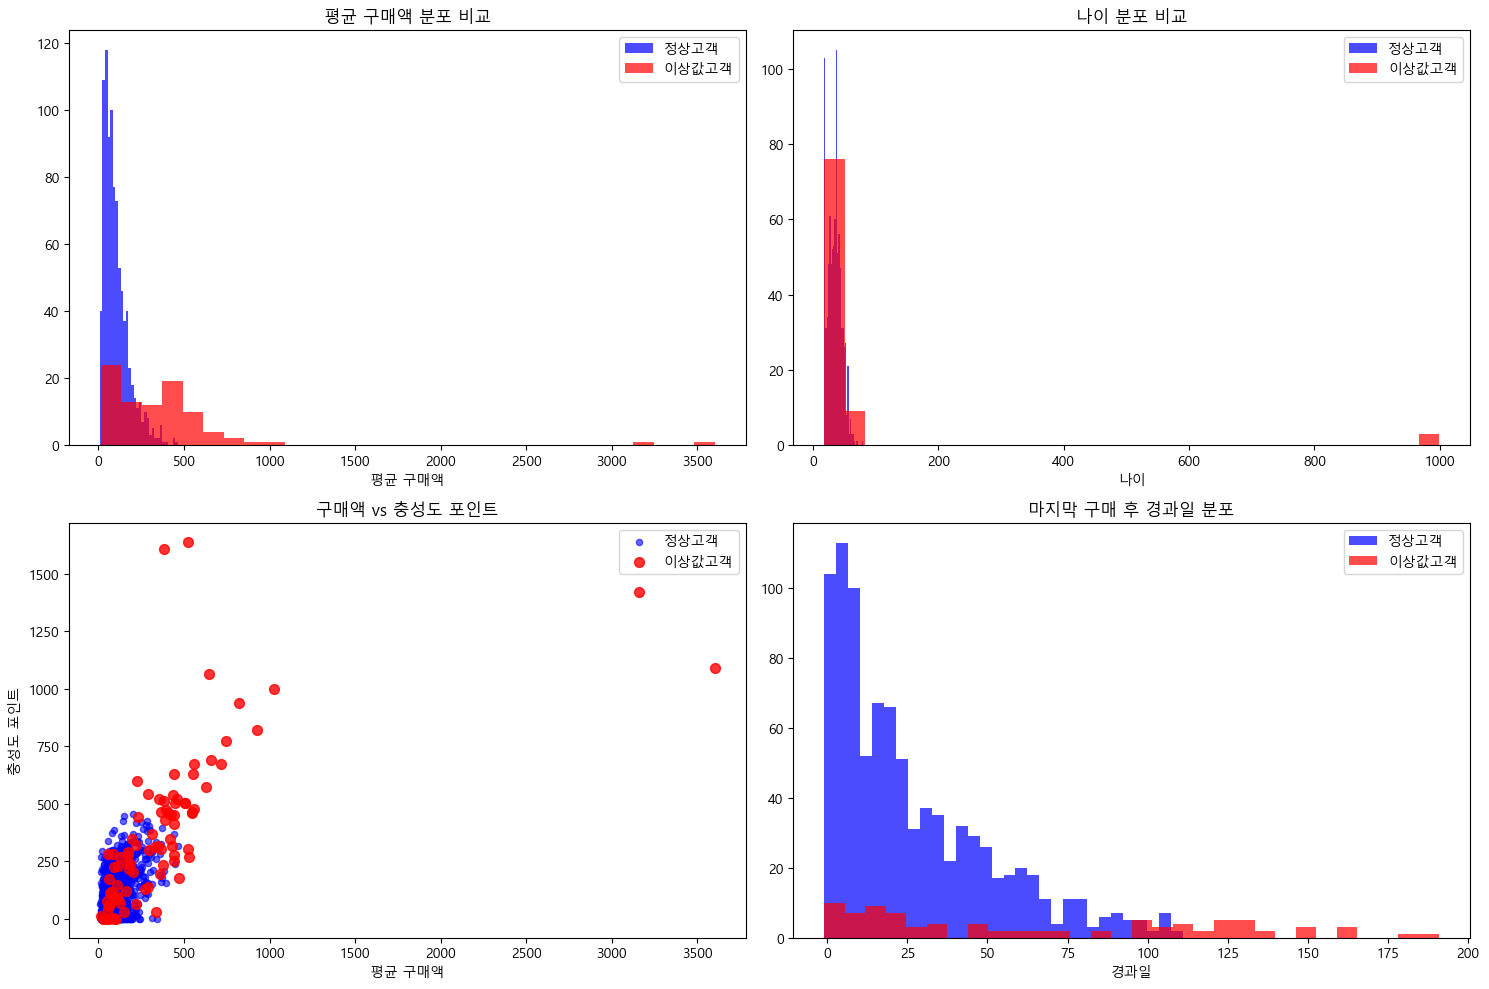

In [ ]:
# Ïù¥ÏÉÅÍ∞í Ìï¥ÏÑù

def outlier_interpretation_strategy(df, outliers_mask):
    """Ïù¥ÏÉÅÍ∞í Ìï¥ÏÑù Î∞è Ï≤òÎ¶¨ Ï†ÑÎûµ ÏàòÎ¶Ω"""
    
    print("=== Ïù¥ÏÉÅÍ∞í Ìï¥ÏÑù Î∞è Ï≤òÎ¶¨ Ï†ÑÎûµ ===")
    
    # Ïù¥ÏÉÅÍ∞í ÌäπÏÑ± Î∂ÑÏÑù
    normal_customers = df[~outliers_mask]
    outlier_customers = df[outliers_mask]
    
    if len(outlier_customers) == 0:
        print("Ïù¥ÏÉÅÍ∞íÏù¥ ÏóÜÏäµÎãàÎã§.")
        return
    
    print("\n1. Ïù¥ÏÉÅÍ∞í vs Ï†ïÏÉÅÍ∞í ÎπÑÍµê Î∂ÑÏÑù")
    
    comparison_vars = ['age', 'total_purchases', 'avg_order_value', 'days_since_last_purchase', 'loyalty_points']
    
    comparison_stats = pd.DataFrame({
        'Ï†ïÏÉÅÍ≥†Í∞ù_ÌèâÍ∑†': normal_customers[comparison_vars].mean(),
        'Ïù¥ÏÉÅÍ∞íÍ≥†Í∞ù_ÌèâÍ∑†': outlier_customers[comparison_vars].mean(),
        'Ï†ïÏÉÅÍ≥†Í∞ù_Ï§ëÏúÑÏàò': normal_customers[comparison_vars].median(),
        'Ïù¥ÏÉÅÍ∞íÍ≥†Í∞ù_Ï§ëÏúÑÏàò': outlier_customers[comparison_vars].median()
    }).round(2)
    
    comparison_stats['Ï∞®Ïù¥Î∞∞Ïàò'] = (comparison_stats['Ïù¥ÏÉÅÍ∞íÍ≥†Í∞ù_ÌèâÍ∑†'] / comparison_stats['Ï†ïÏÉÅÍ≥†Í∞ù_ÌèâÍ∑†']).round(2)
    
    display(comparison_stats)
    
    # 2. Ïù¥ÏÉÅÍ∞í Î∂ÑÎ•ò Î∞è Ï≤òÎ¶¨ Ï†ÑÎûµ
    print(f"\n2. Ïù¥ÏÉÅÍ∞í Î∂ÑÎ•ò Î∞è Ï≤òÎ¶¨ Ï†ÑÎûµ")
    
    # VIP Í≥†Í∞ù (ÎÜíÏùÄ Íµ¨Îß§Ïï° + ÎÜíÏùÄ Ï∂©ÏÑ±ÎèÑ)
    vip_mask = (outlier_customers['avg_order_value'] > normal_customers['avg_order_value'].quantile(0.95)) & \
               (outlier_customers['loyalty_points'] > normal_customers['loyalty_points'].quantile(0.95))
    vip_count = vip_mask.sum()
    
    # Îç∞Ïù¥ÌÑ∞ Ïò§Î•ò (ÎÇòÏù¥ 999ÏÇ¥, ÏùåÏàò ÎÇ†Ïßú Îì±)
    error_mask = (outlier_customers['age'] > 100) | (outlier_customers['days_since_last_purchase'] < 0)
    error_count = error_mask.sum()
    
    # Ïù¥ÏÉÅ ÌñâÎèô Í≥†Í∞ù (Ïò§Îû´ÎèôÏïà Íµ¨Îß§ ÏóÜÏùå)
    dormant_mask = outlier_customers['days_since_last_purchase'] > normal_customers['days_since_last_purchase'].quantile(0.95)
    dormant_count = dormant_mask.sum()
    
    print(f"  VIP Í≥†Í∞ù (ÌäπÎ≥Ñ Í¥ÄÎ¶¨ ÎåÄÏÉÅ): {vip_count}Î™Ö")
    print(f"  Îç∞Ïù¥ÌÑ∞ Ïò§Î•ò (ÏàòÏ†ï/Ï†úÍ±∞ ÌïÑÏöî): {error_count}Î™Ö") 
    print(f"  Ìú¥Î©¥ Í≥†Í∞ù (Ïû¨ÌôúÏÑ±Ìôî ÎåÄÏÉÅ): {dormant_count}Î™Ö")
    print(f"  Í∏∞ÌÉÄ Ïù¥ÏÉÅÍ∞í: {len(outlier_customers) - vip_count - error_count - dormant_count}Î™Ö")
    
    # ÏãúÍ∞ÅÌôî (ÏÜåÎ¨∏Ïûê Î≥ÄÏàòÎ™Ö ÏÇ¨Ïö©)
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]
    # Íµ¨Îß§Ïï° Î∂ÑÌè¨ ÎπÑÍµê
    a1.hist(normal_customers['avg_order_value'], bins=30, alpha=0.7, label='Ï†ïÏÉÅÍ≥†Í∞ù', color='blue')
    a1.hist(outlier_customers['avg_order_value'], bins=30, alpha=0.7, label='Ïù¥ÏÉÅÍ∞íÍ≥†Í∞ù', color='red')
    a1.set_title('ÌèâÍ∑† Íµ¨Îß§Ïï° Î∂ÑÌè¨ ÎπÑÍµê')
    a1.set_xlabel('ÌèâÍ∑† Íµ¨Îß§Ïï°')
    a1.legend()
    
    # ÎÇòÏù¥ Î∂ÑÌè¨ ÎπÑÍµê
    a2.hist(normal_customers['age'], bins=30, alpha=0.7, label='Ï†ïÏÉÅÍ≥†Í∞ù', color='blue')
    a2.hist(outlier_customers['age'], bins=30, alpha=0.7, label='Ïù¥ÏÉÅÍ∞íÍ≥†Í∞ù', color='red')
    a2.set_title('ÎÇòÏù¥ Î∂ÑÌè¨ ÎπÑÍµê')
    a2.set_xlabel('ÎÇòÏù¥')
    a2.legend()
    
    # Íµ¨Îß§Ïï° vs Ï∂©ÏÑ±ÎèÑ Ìè¨Ïù∏Ìä∏ ÏÇ∞Ï†êÎèÑ
    a3.scatter(normal_customers['avg_order_value'], normal_customers['loyalty_points'], 
                     alpha=0.6, label='Ï†ïÏÉÅÍ≥†Í∞ù', color='blue', s=20)
    a3.scatter(outlier_customers['avg_order_value'], outlier_customers['loyalty_points'], 
                     alpha=0.8, label='Ïù¥ÏÉÅÍ∞íÍ≥†Í∞ù', color='red', s=50)
    a3.set_xlabel('ÌèâÍ∑† Íµ¨Îß§Ïï°')
    a3.set_ylabel('Ï∂©ÏÑ±ÎèÑ Ìè¨Ïù∏Ìä∏')
    a3.set_title('Íµ¨Îß§Ïï° vs Ï∂©ÏÑ±ÎèÑ Ìè¨Ïù∏Ìä∏')
    a3.legend()
    
    # ÎßàÏßÄÎßâ Íµ¨Îß§ ÌõÑ Í≤ΩÍ≥ºÏùº Î∂ÑÌè¨
    a4.hist(normal_customers['days_since_last_purchase'], bins=30, alpha=0.7, label='Ï†ïÏÉÅÍ≥†Í∞ù', color='blue')
    a4.hist(outlier_customers['days_since_last_purchase'], bins=30, alpha=0.7, label='Ïù¥ÏÉÅÍ∞íÍ≥†Í∞ù', color='red')
    a4.set_title('ÎßàÏßÄÎßâ Íµ¨Îß§ ÌõÑ Í≤ΩÍ≥ºÏùº Î∂ÑÌè¨')
    a4.set_xlabel('Í≤ΩÍ≥ºÏùº')
    a4.legend()
    
    plt.tight_layout()
    plt.show()

# Ïù¥ÏÉÅÍ∞í Ìï¥ÏÑù Î∞è Ï†ÑÎûµ ÏàòÎ¶Ω
outlier_interpretation_strategy(df_mice, final_outliers)

In [11]:
# Ïù¥ÏÉÅÍ∞í Ï≤òÎ¶¨

def execute_outlier_treatment(df:pd.DataFrame, outlier_mask):
    print('=== Ïù¥ÏÉÅÍ∞í Ï≤òÎ¶¨ Ïã§Ìñâ ===')
    df_treated = df.copy()
    
    
    
    
    
    
    
    
    
execute_outlier_treatment(df_knn, final_outliers)

=== Ïù¥ÏÉÅÍ∞í Ï≤òÎ¶¨ Ïã§Ìñâ ===
